In [313]:
# Required Libraries
import requests
import pandas as pd
import numpy as np
import tweepy
import json

In [314]:
# image-predictions data 
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
with open('image-predictions.tsv', 'wb') as file:
    file.write(response.content)
    
image_predictions_df = pd.read_csv('image-predictions.tsv', sep='\t')
image_predictions_df.head(5)

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

In [315]:
# image_predictions_df programmatic Assessment 
print(sum(image_predictions_df.duplicated()))
image_predictions_df.info()


0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [316]:
# Imported Dataset 2
twitter_df = pd.read_csv('twitter-archive-enhanced.csv')
twitter_df.head(5)


tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

In [317]:
# Assessment for twitter_df
print(sum(twitter_df.duplicated()))
twitter_df.info()


0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       235

In [318]:
# Not all denominator here are 10
twitter_df['rating_denominator'].value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [319]:
# Some numinator exceeds limit like 1776
twitter_df['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [320]:
# Invalid dog name
twitter_df['name'].value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [321]:
# twitter dataset 3
consumer_key = 'YTqtg8lEGSYNLPTOdMHJGtYnY'
consumer_secret = 'sVnfxPpUoD5h9ZosrzrzXLycjCaU8CRUpcjmxUGoPMNeH2UYiy'
access_token = '4024776974-dujBLJilgIiuQxR4zrSvPsF9om9gjyakPrsO7L8'
access_token_secret = 'n2mYXBciHLUjkFM4wymHypb4rZfjLiDDRvhI2MI36OWCd'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

tweets_data = []

with open('tweet_json.txt', 'r') as file:
    for line in file:
        tweet = json.loads(line)
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        favorite_count = tweet['favorite_count']
        tweets_data.append({'tweet_id': tweet_id, 'retweet_count': retweet_count, 'favorite_count': favorite_count})

tweet_api_df = pd.DataFrame(tweets_data, columns=['tweet_id', 'retweet_count', 'favorite_count'])

tweet_api_df.head()

tweet_id  retweet_count  favorite_count
0  892420643555336193           8853           39467
1  892177421306343426           6514           33819
2  891815181378084864           4328           25461
3  891689557279858688           8964           42908
4  891327558926688256           9774           41048

In [322]:
# Programmatic Assessment 

print(sum(tweet_api_df.duplicated()))

tweet_api_df.info()

0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


## Quality Issues

##### No Quality issue in dataframes tweet_api_df and  image_predictions_df

1. Inconsistent breed names --> image_predictions_df

2. '_' in breed names p1, p2, p3 --> image_predictions_df 

3. tweet_id as integer --> image_predictions_df, twitter_df, tweet_api_df

4. Not all records have denominator as 10 --> twitter_df

5. Missing data for in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls --> twitter_df

6. Missing data for in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id should be string --> twitter_df 

7. Invalid dog names as None, a  --> twitter_df

8. data type of timestamp is as object --> twitter_df 

9. Retweets exisiting in dataset


## Tidiness Issues

1. The data for the project is gathered from three different sources - the WeRateDogs Twitter archive, the tweet image predictions file, and the Twitter API. To make the data tidy, all the data should be combined into a single dataset, with each variable as a separate column. 

2. The dog "stage" variable is spread across four columns - doggo, floofer, pupper, and puppo. To make the data tidy, these four columns should be merged into a single column.

## Cleaning for Quality issues

In [323]:
# For dataframe image_predictions_df , created copy of dataframe
image_predictions_df_clean = image_predictions_df.copy()
twitter_df_clean = twitter_df.copy()
tweet_api_df_clean = tweet_api_df.copy()

#### Define:

Issue 1:

Inconsistent breed names in dataframe image_predictions_df where all the names should be in small case


#### Code:

In [324]:
image_predictions_df_clean['p1'] = image_predictions_df_clean['p1'].str.lower()
image_predictions_df_clean['p2'] = image_predictions_df_clean['p2'].str.lower()
image_predictions_df_clean['p3'] = image_predictions_df_clean['p3'].str.lower()


#### Test:

In [325]:
image_predictions_df_clean.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         german_shepherd  0.596461    True            malinois   
3        1     rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    shetland_sheepdog  0.061428    True  
1  0.074192    True  rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             doberman  0.154629    True

#### Define:

Issue 2:

Underscore '_' in breed names columns p1, p2, p3 respectively
this should be replaced by ' ' 


#### Code:


In [326]:
underscore_check = image_predictions_df_clean['p1'].str.contains('_')
print(sum(underscore_check))


1081


In [327]:

# To solve the issue performing replacement
image_predictions_df_clean['p1'] = image_predictions_df_clean['p1'].str.replace('_', ' ')
image_predictions_df_clean['p2'] = image_predictions_df_clean['p2'].str.replace('_', ' ')
image_predictions_df_clean['p3'] = image_predictions_df_clean['p3'].str.replace('_', ' ')


#### Test:

In [328]:

underscore_check = image_predictions_df_clean['p1'].str.contains('_')
print(sum(underscore_check))


0


#### Define :

Issue 3:
Converting tweet_id to String as it is not ment to perform any operations for all the tables

#### Code:

In [329]:
image_predictions_df_clean['tweet_id'] = image_predictions_df_clean['tweet_id'].astype(str)
twitter_df_clean['tweet_id'] = twitter_df_clean['tweet_id'].astype(str)
tweet_api_df_clean['tweet_id'] = tweet_api_df_clean['tweet_id'].astype(str)

#### Test:

In [330]:
print(image_predictions_df_clean['tweet_id'].dtypes)
print(twitter_df_clean['tweet_id'].dtypes)
print(tweet_api_df_clean['tweet_id'].dtypes)

object
object
object


#### Define :

Issue 4:

Not all denominators have 10 so making it to 10 as others are mis leading

#### Code:


In [331]:
twitter_df_clean['rating_denominator'] = twitter_df_clean['rating_denominator'].apply(lambda x: 10 if x != 10 else x)


#### Test:


In [332]:
# Now all has same denominator
twitter_df_clean['rating_denominator'].value_counts()

10    2356
Name: rating_denominator, dtype: int64

#### Define :

Issue 5:

Missing data for in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls; its better to drop those rows as we dont need the retweet data

#### Code:

In [333]:
twitter_df_clean = twitter_df_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'], axis=1)


#### Test:


In [334]:
twitter_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2356 non-null   object
 1   timestamp           2356 non-null   object
 2   source              2356 non-null   object
 3   text                2356 non-null   object
 4   expanded_urls       2297 non-null   object
 5   rating_numerator    2356 non-null   int64 
 6   rating_denominator  2356 non-null   int64 
 7   name                2356 non-null   object
 8   doggo               2356 non-null   object
 9   floofer             2356 non-null   object
 10  pupper              2356 non-null   object
 11  puppo               2356 non-null   object
dtypes: int64(2), object(10)
memory usage: 221.0+ KB


#### Define :

Issue 6:
 
Invalid dog names as None, a

#### Code:


In [335]:
non_name = ['None', 'very', 'incredibly', 'his', 'just', 'getting', 'mad', 'this', 'unacceptable', 'all', 
            'old', 'by', 'life', 'light', 'space', 'a']

twitter_df_clean.loc[twitter_df_clean['name'].isin(non_name), 'name'] = None
    


#### Test:


In [336]:
twitter_df_clean['name'].value_counts()

Charlie       12
Oliver        11
Lucy          11
Cooper        11
Penny         10
              ..
Devón          1
Gert           1
Dex            1
Ace            1
Christoper     1
Name: name, Length: 941, dtype: int64

#### Define :

Issue 7:
 Missing data for in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id should be string --> twitter_df 
 
 missing data for url too
 
 This issue is handled by removing retweets

#### Define :

Issue 8:
data type of timestamp is object. hence, convert to timestamp


#### Code:


In [337]:
twitter_df_clean['timestamp'] = pd.to_datetime(twitter_df_clean['timestamp'])


#### Test:


In [338]:
print(twitter_df_clean['timestamp'].dtypes)


datetime64[ns, UTC]


## Storing data

### Solving 2 tidiness Issuues

In [339]:
# Merge df1 and df2 on the common column
twitter_combine_df = pd.merge(image_predictions_df_clean, twitter_df_clean, on='tweet_id')

# Merge merged_df and df3 on the common column
twitter_archive_master_df = pd.merge(tweet_api_df_clean, twitter_combine_df, on='tweet_id')
twitter_archive_master_df.head()

tweet_id  retweet_count  favorite_count  \
0  892420643555336193           8853           39467   
1  892177421306343426           6514           33819   
2  891815181378084864           4328           25461   
3  891689557279858688           8964           42908   
4  891327558926688256           9774           41048   

                                           jpg_url  img_num           p1  \
0  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg        1       orange   
1  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg        1    chihuahua   
2  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg        1    chihuahua   
3  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg        1  paper towel   
4  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg        2       basset   

    p1_conf  p1_dog                  p2   p2_conf  ...  \
0  0.097049   False               bagel  0.085851  ...   
1  0.323581    True            pekinese  0.090647  ...   
2  0.716012    True            malamute  0.078253  ...   
3  0.170278   False  labrador retriever  0.168086  ...   
4  0.555712    True    english springer  0.225770  ...   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   
1  This is Tilly. She's just checking pup on you....   
2  This is Archie. He is a rare Norwegian Pouncin...   
3  This is Darla. She commenced a snooze mid meal...   
4  This is Franklin. He would like you to stop ca...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

  rating_denominator      name doggo floofer  pupper  puppo  
0                 10   Phineas  None    None    None   None  
1                 10     Tilly  None    None    None   None  
2                 10    Archie  None    None    None   None  
3                 10     Darla  None    None    None   None  
4                 10  Franklin  None    None    None   None  

[5 rows x 25 columns]

In [340]:
# First replace None in stage columns with empty string as follows.

twitter_archive_master_df.doggo.replace('None', '', inplace=True) 
twitter_archive_master_df.floofer.replace('None', '', inplace=True)
twitter_archive_master_df.pupper.replace('None', '', inplace=True)
twitter_archive_master_df.puppo.replace('None', '', inplace=True)

twitter_archive_master_df['stage'] = twitter_archive_master_df.doggo + twitter_archive_master_df.floofer + twitter_archive_master_df.pupper + twitter_archive_master_df.puppo

# Then format entries with multiple dog stages which appeared like doggopupper.

twitter_archive_master_df.loc[twitter_archive_master_df.stage == 'doggopupper', 'stage'] = 'doggo,pupper'

twitter_archive_master_df.loc[twitter_archive_master_df.stage == 'doggopuppo', 'stage'] = 'doggo,puppo'

twitter_archive_master_df.loc[twitter_archive_master_df.stage == 'doggofloofer', 'stage'] = 'doggo,floofer'

twitter_archive_master_df.head()


tweet_id  retweet_count  favorite_count  \
0  892420643555336193           8853           39467   
1  892177421306343426           6514           33819   
2  891815181378084864           4328           25461   
3  891689557279858688           8964           42908   
4  891327558926688256           9774           41048   

                                           jpg_url  img_num           p1  \
0  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg        1       orange   
1  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg        1    chihuahua   
2  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg        1    chihuahua   
3  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg        1  paper towel   
4  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg        2       basset   

    p1_conf  p1_dog                  p2   p2_conf  ...  \
0  0.097049   False               bagel  0.085851  ...   
1  0.323581    True            pekinese  0.090647  ...   
2  0.716012    True            malamute  0.078253  ...   
3  0.170278   False  labrador retriever  0.168086  ...   
4  0.555712    True    english springer  0.225770  ...   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   
1  This is Tilly. She's just checking pup on you....   
2  This is Archie. He is a rare Norwegian Pouncin...   
3  This is Darla. She commenced a snooze mid meal...   
4  This is Franklin. He would like you to stop ca...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper  puppo  stage  
0                  10   Phineas                                     
1                  10     Tilly                                     
2                  10    Archie                                     
3                  10     Darla                                     
4                  10  Franklin                                     

[5 rows x 26 columns]

In [341]:
# Checking for values in our new added column
twitter_archive_master_df['stage'].value_counts()

                 1753
pupper            210
doggo              67
puppo              23
doggo,pupper       11
floofer             7
doggo,puppo         1
doggo,floofer       1
Name: stage, dtype: int64

In [342]:
#Droping other 4 columns now
twitter_archive_master_df = twitter_archive_master_df.drop(['pupper', 'doggo','puppo','floofer'], axis=1)


In [343]:
twitter_archive_master_df.tail()


tweet_id  retweet_count  favorite_count  \
2068  666049248165822465             41             111   
2069  666044226329800704            147             311   
2070  666033412701032449             47             128   
2071  666029285002620928             48             132   
2072  666020888022790149            532            2535   

                                              jpg_url  img_num  \
2068  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg        1   
2069  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg        1   
2070  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg        1   
2071  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg        1   
2072  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg        1   

                          p1   p1_conf  p1_dog                  p2   p2_conf  \
2068      miniature pinscher  0.560311    True          rottweiler  0.243682   
2069     rhodesian ridgeback  0.408143    True             redbone  0.360687   
2070         german shepherd  0.596461    True            malinois  0.138584   
2071                 redbone  0.506826    True  miniature pinscher  0.074192   
2072  welsh springer spaniel  0.465074    True              collie  0.156665   

      ...   p3_conf p3_dog                 timestamp  \
2068  ...  0.154629   True 2015-11-16 00:24:50+00:00   
2069  ...  0.222752   True 2015-11-16 00:04:52+00:00   
2070  ...  0.116197   True 2015-11-15 23:21:54+00:00   
2071  ...  0.072010   True 2015-11-15 23:05:30+00:00   
2072  ...  0.061428   True 2015-11-15 22:32:08+00:00   

                                                 source  \
2068  <a href="http://twitter.com/download/iphone" r...   
2069  <a href="http://twitter.com/download/iphone" r...   
2070  <a href="http://twitter.com/download/iphone" r...   
2071  <a href="http://twitter.com/download/iphone" r...   
2072  <a href="http://twitter.com/download/iphone" r...   

                                                   text  \
2068  Here we have a 1949 1st generation vulpix. Enj...   
2069  This is a purebred Piers Morgan. Loves to Netf...   
2070  Here is a very happy pup. Big fan of well-main...   
2071  This is a western brown Mitsubishi terrier. Up...   
2072  Here we have a Japanese Irish Setter. Lost eye...   

                                          expanded_urls rating_numerator  \
2068  https://twitter.com/dog_rates/status/666049248...                5   
2069  https://twitter.com/dog_rates/status/666044226...                6   
2070  https://twitter.com/dog_rates/status/666033412...                9   
2071  https://twitter.com/dog_rates/status/666029285...                7   
2072  https://twitter.com/dog_rates/status/666020888...                8   

     rating_denominator  name  stage  
2068                 10  None         
2069                 10  None         
2070                 10  None         
2071                 10  None         
2072                 10  None         

[5 rows x 22 columns]

In [344]:
# Storing cleaned datset in csv
twitter_archive_master_df.to_csv('twitter_archive_master.csv', index=False)


## Visualizing Wrangled data

### Insights

#### 1. Which is most popular dog name
#### 2. Which is most favourite and retweeted dog tweet
#### 3. Which is most common stage of dogs

In [345]:
master_df = pd.read_csv('twitter_archive_master.csv')
master_df.head()

tweet_id  retweet_count  favorite_count  \
0  892420643555336193           8853           39467   
1  892177421306343426           6514           33819   
2  891815181378084864           4328           25461   
3  891689557279858688           8964           42908   
4  891327558926688256           9774           41048   

                                           jpg_url  img_num           p1  \
0  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg        1       orange   
1  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg        1    chihuahua   
2  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg        1    chihuahua   
3  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg        1  paper towel   
4  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg        2       basset   

    p1_conf  p1_dog                  p2   p2_conf  ...   p3_conf p3_dog  \
0  0.097049   False               bagel  0.085851  ...  0.076110  False   
1  0.323581    True            pekinese  0.090647  ...  0.068957   True   
2  0.716012    True            malamute  0.078253  ...  0.031379   True   
3  0.170278   False  labrador retriever  0.168086  ...  0.040836  False   
4  0.555712    True    english springer  0.225770  ...  0.175219   True   

                   timestamp  \
0  2017-08-01 16:23:56+00:00   
1  2017-08-01 00:17:27+00:00   
2  2017-07-31 00:18:03+00:00   
3  2017-07-30 15:58:51+00:00   
4  2017-07-29 16:00:24+00:00   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   
1  This is Tilly. She's just checking pup on you....   
2  This is Archie. He is a rare Norwegian Pouncin...   
3  This is Darla. She commenced a snooze mid meal...   
4  This is Franklin. He would like you to stop ca...   

                                       expanded_urls rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...               13   
1  https://twitter.com/dog_rates/status/892177421...               13   
2  https://twitter.com/dog_rates/status/891815181...               12   
3  https://twitter.com/dog_rates/status/891689557...               13   
4  https://twitter.com/dog_rates/status/891327558...               12   

  rating_denominator      name  stage  
0                 10   Phineas    NaN  
1                 10     Tilly    NaN  
2                 10    Archie    NaN  
3                 10     Darla    NaN  
4                 10  Franklin    NaN  

[5 rows x 22 columns]

#### 1. Which is most popular dog name

Charlie is the most popular dog name


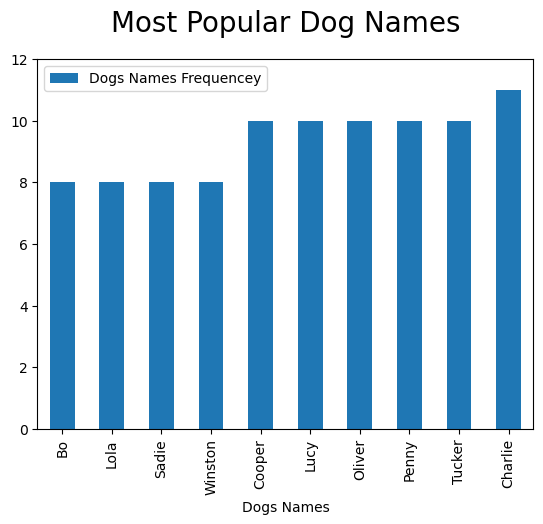

In [346]:
# Popular dog names -- Insight 1
import matplotlib.pyplot as plt 
named_dogs = master_df.query('name == name')
named_dogs_grouped = named_dogs.groupby('name').count()[['tweet_id']]
named_dogs_grouped.rename(columns={'tweet_id':'name_count'}, inplace=True)
named_dogs_grouped.query('name_count >= 8').sort_values(by=['name_count']).plot.bar()
plt.ylim(top=12)
plt.title("Most Popular Dog Names",{'fontsize': 20},pad=20)
plt.xlabel("Dogs Names")
plt.legend(["Dogs Names Frequencey"])

print('Charlie is the most popular dog name')

#### 2. Which is most favourite and retweeted dog tweet

In [347]:
# Insight 2 ; Most dog tweet got favorited and retweeted


master_df[master_df.favorite_count == master_df.favorite_count.max()]

tweet_id  retweet_count  favorite_count  \
329  822872901745569793          48265          132810   

                                             jpg_url  img_num  \
329  https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg        1   

                   p1   p1_conf  p1_dog                  p2   p2_conf  ...  \
329  lakeland terrier  0.196015    True  labrador retriever  0.160329  ...   

      p3_conf p3_dog                  timestamp  \
329  0.069126   True  2017-01-21 18:26:02+00:00   

                                                source  \
329  <a href="http://twitter.com/download/iphone" r...   

                                                  text  \
329  Here's a super supportive puppo participating ...   

                                         expanded_urls rating_numerator  \
329  https://twitter.com/dog_rates/status/822872901...               13   

    rating_denominator  name  stage  
329                 10   NaN  puppo  

[1 rows x 22 columns]

In [348]:
master_df.query('tweet_id == "822872901745569793"')['text']
print("Here's a super supportive puppo participating")


Here's a super supportive puppo participating


#### 3. Which is most common stage of dogs

In [349]:
# Insight 3; most common stage --Pupper
master_df['stage'].value_counts()

pupper           210
doggo             67
puppo             23
doggo,pupper      11
floofer            7
doggo,puppo        1
doggo,floofer      1
Name: stage, dtype: int64

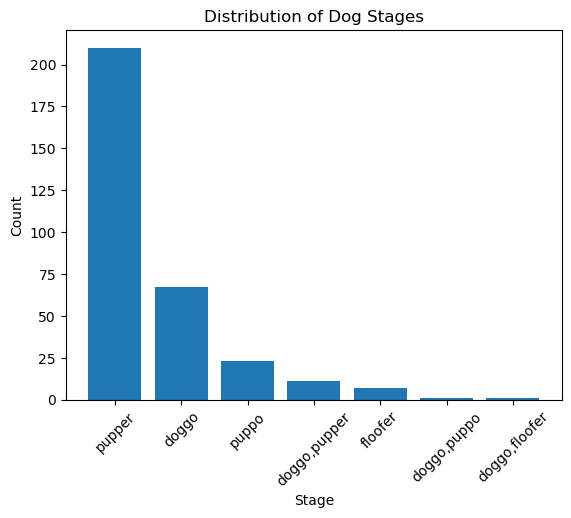

In [350]:
import matplotlib.pyplot as plt

# Get the value counts of the 'stage' column
stage_counts = master_df['stage'].value_counts()

# Create a bar chart
plt.bar(stage_counts.index, stage_counts.values)

# Add labels and title
plt.xlabel('Stage')
plt.ylabel('Count')
plt.title('Distribution of Dog Stages')

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Display the chart
plt.show()